In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

## Описание проекта

### Цель
Выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Описание данных
- `Name` - название игры;
- `Platform` - платформа;
- `Year_of_Release` - год выпуска;
- `Genre` - жанр игры;
- `NA_sales` - продажи в Северной Америке (миллионы проданных копий);
- `EU_sales` - продажи в Европе (миллионы проданных копий);
- `JP_sales` - продажи в Японии (миллионы проданных копий);
- `Other_sales` - продажи в других странах (миллионы проданных копий);
- `Critic_Score` - оценка критиков (максимум 100);
- `User_Score` - оценка пользователей (максимум 10);
- `Rating` - рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Чтение данных и общая информация
### Чтение данных из файла

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

### Общая информация о датафрейме

#### Размерность
Определим размерность датасета, количество строк сохраним в отдельную преременную `n_rows`, чтобы потом оценть долю данных сотавшихся после удаления пропусков.

In [3]:
n_rows = data.shape[0]
print(f'Датасет имеет {n_rows} строк и {data.shape[1]} столбцов.')

Датасет имеет 16715 строк и 11 столбцов.


#### Первые 10 строк

In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Датафрейм содержит данные разных типов: числовые, номнативные (категориальные), дату (столбец `Year_of_Release`), строки (например, столбец `Name`).

Данные содержат пропуски, числовые данные могут содержать выбросы, в данных могут быть дубликаты.

#### Общая информация о столбцах (количество ненулевых значений и типы данных)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Данные содержат пропуски, ряд столбцов имеют неверный тип данных, например `Year_of_Release` и `User_Score`.

#### Доля пропусков в каждом столбце
Вычислим количество пропусков `number_of_missing_values` и их долю `fraction_of_missing_valuse` в каждом столбце.

In [6]:
def count_missing_values(df):
    '''Вычисляет количество пропущенных значений и их долю в каждом столбце'''
    return (df
            .isna()
            .agg(['sum', 'mean'])
            .transpose()
            .sort_values('mean', ascending=False)
            .rename(columns={'sum': 'number_of_missing_values',
                             'mean': 'fraction_of_missing_valuse'})
           )

In [7]:
count_missing_values(data)

,number_of_missing_values,fraction_of_missing_valuse
Critic_Score,8578.0,0.513192
Rating,6766.0,0.404786
User_Score,6701.0,0.400897
Year_of_Release,269.0,0.016093
Name,2.0,0.000120
Genre,2.0,0.000120
Platform,0.0,0.000000
NA_sales,0.0,0.000000
EU_sales,0.0,0.000000
JP_sales,0.0,0.000000


####  Описательные статистики
Для столбцов с типом `float64`:

In [8]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Для столбцов с типом `object`

In [9]:
data.describe(include='object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


Найдём значение, встречающееся чаще всех, для каждого столбца.

In [10]:
data.mode()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Need for Speed: Most Wanted,PS2,2008.0,Action,0.0,0.0,0.0,0.0,70.0,tbd,E


#### Гистограммы

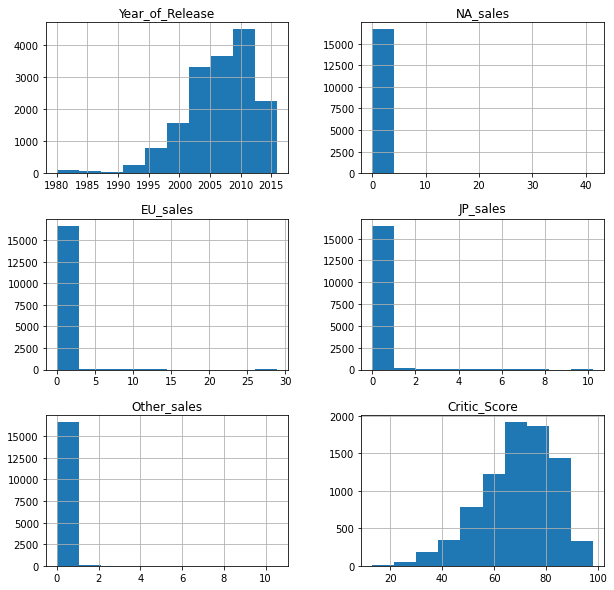

In [11]:
data.hist(figsize=(10,10))
plt.show()

Гистограммы для столбцов `NA_sales`, `EU_sales`, `JP_sales`, `Other_sales` получились не очень информативными из-за очень большого количества значений близких к нулю в этих столбцах. Распределения значений в столбцах `Year_of_Release`, `Critic_Score`, по форме близки к нормальному распределению, но имеют отрицательную скошенность.

## Подготовка данных

### Замена названий столбцов
Приведём названия всех столбцов к нижнему регистру

In [12]:
data.columns = [x.lower() for x in data.columns]

Выведем новые названия столбцов

In [13]:
print(*data.columns, sep='\n')

name
platform
year_of_release
genre
na_sales
eu_sales
jp_sales
other_sales
critic_score
user_score
rating


### Аббревиатура "tbd" в столбце `user_score`
Согласно [кембриджскому словарю](https://dictionary.cambridge.org/dictionary/english/tbd) аббревиатура TBD расшифровывается как "to be decided", то есть "предстоит решить". Вероятно, данной абревиатурой отмечены игры, которые еще не набрали достаточного количества отзывов от пользователей, поэтому можно заменить аббревиатуру значением `np.nan`.

Нужно отметить, что значение 'tbd' соответствует не только новинкам (с учётом того, что в датасете данные до 2016 г.), чтобы продемонстрировать это выведем 10 случайно отобранных строк датафрейма для которых атрибут `user_score` равняется 'tbd'

In [14]:
data.query('user_score == "tbd"').sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8014,Happy Cooking,DS,2006.0,Simulation,0.17,0.00,0.0,0.01,NaN,tbd,E
9786,Rush,PSP,2006.0,Racing,0.11,0.00,0.0,0.01,55.0,tbd,T
4263,The Princess and the Frog,Wii,2009.0,Platform,0.29,0.13,0.0,0.04,NaN,tbd,E
16130,WinBack 2: Project Poseidon,PS2,2006.0,Shooter,0.01,0.01,0.0,0.00,48.0,tbd,T
11370,Mortal Kombat Kollection,PS2,2008.0,Fighting,0.04,0.03,0.0,0.01,NaN,tbd,M
10236,ESA Game Pack,PS3,2010.0,Misc,0.10,0.00,0.0,0.01,NaN,tbd,T
15772,Agatha Christie: Death on the Nile,PC,2008.0,Adventure,0.00,0.01,0.0,0.00,NaN,tbd,T
15202,Thomas and Friends: Steaming around Sodor,3DS,2015.0,Action,0.00,0.02,0.0,0.00,NaN,tbd,NaN
11170,El Tigre: The Adventures of Manny Rivera,DS,2007.0,Platform,0.08,0.00,0.0,0.01,53.0,tbd,E
5697,Shrek the Third,PSP,2007.0,Action,0.08,0.15,0.0,0.09,57.0,tbd,E10+


Заменим "tbd" на `np.nan`.

In [15]:
data.user_score.replace({'tbd': np.nan}, inplace=True)

### Обработка пропусков

Вычислим количество пропусков и их долю повторно, так как после замены метки 'tbd' на `np.nan` в столбце `user_score` соотношение пропусков с столбцах изменилось.

In [16]:
count_missing_values(data)

,number_of_missing_values,fraction_of_missing_valuse
user_score,9125.0,0.545917
critic_score,8578.0,0.513192
rating,6766.0,0.404786
year_of_release,269.0,0.016093
name,2.0,0.000120
genre,2.0,0.000120
platform,0.0,0.000000
na_sales,0.0,0.000000
eu_sales,0.0,0.000000
jp_sales,0.0,0.000000


В столбцах `genre`, `name`, `year_of_release` пропусков относительно немного: 2, 2 и 269 соотвтетственно. Маловероятно, что пропуски в данных атрибутах позволят получить полезную аналитику, поэтому просто удалим соответствующие записи.

In [17]:
data.dropna(subset=['genre', 'name', 'year_of_release'], inplace=True)

Проверим результат.

In [18]:
count_missing_values(data)

,number_of_missing_values,fraction_of_missing_valuse
user_score,8981.0,0.546157
critic_score,8461.0,0.514534
rating,6676.0,0.405984
name,0.0,0.000000
platform,0.0,0.000000
year_of_release,0.0,0.000000
genre,0.0,0.000000
na_sales,0.0,0.000000
eu_sales,0.0,0.000000
jp_sales,0.0,0.000000


Столбцы `user_score`, `critic_score`, `rating` каждый содержат более 40% пропусков, поэтому пока оставим их без изменения.

Если в столбце rating заменить пропуски на Unknown, то появится еще одна категория значений, которая будет доступна при дальнейшем анализе. Заменим пропуски на Unknown.

In [19]:
data.rating = data.rating.fillna('Unknown')

Еще раз проверим пропуски.

In [20]:
count_missing_values(data)

,number_of_missing_values,fraction_of_missing_valuse
user_score,8981.0,0.546157
critic_score,8461.0,0.514534
name,0.0,0.000000
platform,0.0,0.000000
year_of_release,0.0,0.000000
genre,0.0,0.000000
na_sales,0.0,0.000000
eu_sales,0.0,0.000000
jp_sales,0.0,0.000000
other_sales,0.0,0.000000


Проверим какая доля исходного датасета осталась после удаления пропусков.

In [21]:
print(f'После удаления пропусков осталось {data.shape[0]/n_rows:.0%} данных.')

После удаления пропусков осталось 98% данных.


**К пропускам могло привести как отсутствие тех или иных данных в открытом досупе, так например пропуске в столбце `critic_score` могут быть обусловлены тем, что критик еще не дал свою оценку. Так же к пропускам могли привести технические ошибки при сборе данных, например к пропускам в столбце `name`.**

### Преобразование типов данных
Выведем тип данных для каждого столбца.

In [22]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

#### Тип `object`
Типу `object` должны соответствовать следующие столбцы:
- `name`;
- `platform`;
- `genre`;
- `rating`.

Оставим данные атрибуты  без изменения.

#### Тип `int`
К данному типу нужно преобразовать столбец `year_of_release`. Поскольку данный столбец содержит года выпуска игр, его можно было бы преобразовать к типу `datetime`, но, скорее всего, в данном случае это было бы избыточно.

In [23]:
data.year_of_release = data.year_of_release.astype('int')

#### Тип `float`
Столбцы `NA_sales`, `EU_sales`, `JP_sales`, `Other_sales`, `Critic_Score`, `User_Score` должны соответстовать типу `float`, так как это количество продаж в миллионах копий и рейтинги. Неверный тип только у столбца `User_Score`, преобразуем его.

In [24]:
data.user_score = data.user_score.astype('float')

Проверим результат

In [25]:
data.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

### Суммарные продажи во всех регионах
Расчитаем суммарные продажи во всех регионах.

In [26]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis='columns')

## Исследовательский анализ данных

### Количество игр, выпускаемых в разные годы
Посчитаем количество игр, выпускаемых в разные годы за все периоды. Построим график.

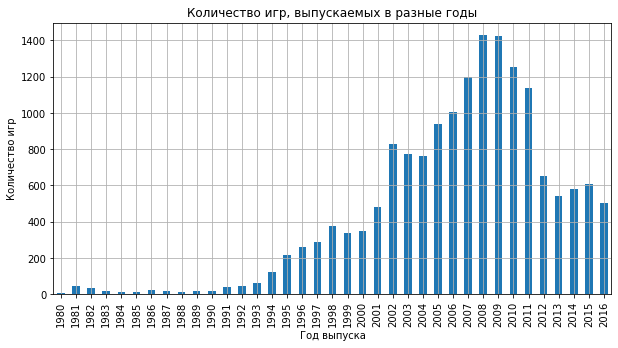

In [27]:
(data
 .groupby('year_of_release')
 .name.count()
 .plot(kind='bar', 
       grid=True, 
       figsize=(10,5),
       title='Количество игр, выпускаемых в разные годы',
       xlabel='Год выпуска',
       ylabel='Количество игр'
      )
)

plt.show()

**Исторические данные охватывают период с 1980 по 2016 гг., с точки зредния цели проекта, такой широки временной охват не нужен. Для выявления закономерностей, определяющих успешность игры, и планирования рекламных компаний необходимы данные только за полследне годы, например за последние 5 лет, так как в период с 1980го по 2016й менялись как технологии, так и предпочтения пользователей.**

**Также важно то, что в период с 1990 г. по 2008 г. количество игр росло, после чего произошёл стремительный спад: количество игр, выпущенных в период с 2012 по 2016й, в 2 раза ниже, чем в период с 2008 по 2009. Такой спад может свидетельствовать о существенных изменениях на рынке.**

Проверим количество уникальных игр. Такая оценка, действительно, будет точнее, так как одни и теже игры выпускались для разных платформ, могли иметь место ремейки игр (в исходной таблие такие игры будут представлены разными строками).

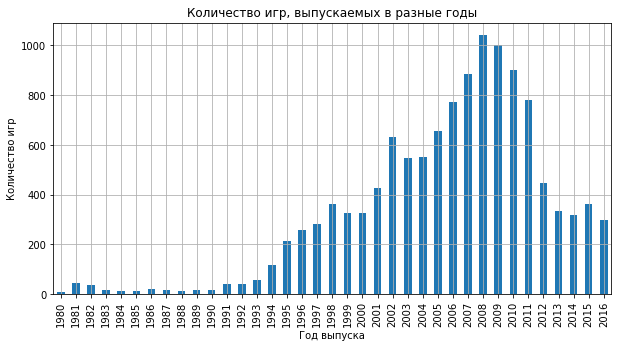

In [28]:
(data
 .groupby('year_of_release')
 .name
 .nunique()
 .plot(kind='bar', 
       grid=True, 
       figsize=(10,5),
       title='Количество игр, выпускаемых в разные годы',
       xlabel='Год выпуска',
       ylabel='Количество игр'
      )
)

plt.show()

Форма графика и пропорции практически неизменились, но значения стали скромнее.

### Продажи в разрезе платформ за весь период

Найдём общее количество платформ предсталенных в датасете.

In [29]:
print(f'В датасете представлена {data.platform.nunique()} платформа.')

В датасете представлена 31 платформа.


Рассчитаем суммарные продажи для каждой платформы за всё время. Выведем на экран 10 с лучшими результатами. Полученные результаты предствим в виде графика.

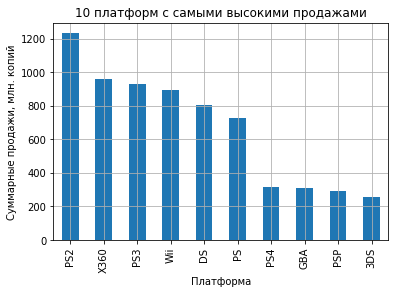

In [30]:
def get_top_platforms(df, n):
    return df.groupby('platform').total_sales.sum().sort_values(ascending=False)[: n]

def plot_top_platfortms(df, n_top_platforms):
    top_platforms = get_top_platforms(df, n_top_platforms)
    
    top_platforms.plot(kind='bar', 
                      grid=True,
                      title=f'{n_top_platforms} платформ с самыми высокими продажами',
                      xlabel='Платформа',
                      ylabel='Суммарные продажи, млн. копий'
                     )
    plt.show()
    
plot_top_platfortms(df=data, n_top_platforms=10)

Построим распределение продаж по годам для 10 платформ с самыми высоким продажами.

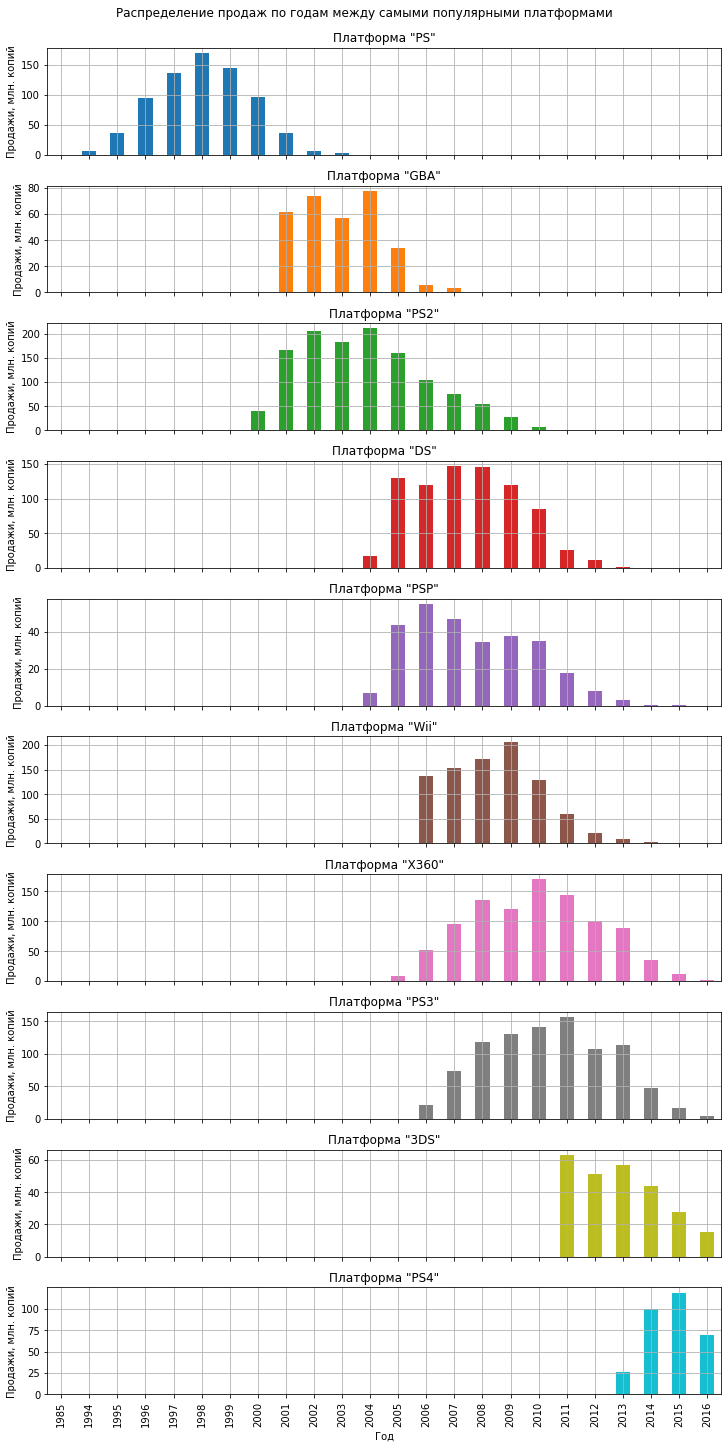

In [31]:
def plot_platforms_individually(df, n_top_platforms, width=10):

    top_platforms_index = get_top_platforms(df, n_top_platforms).index

    fig, axes = plt.subplots(len(top_platforms_index), 
                             1, 
                             sharex=True,
                             sharey=False,
                             figsize=(width, 2 * len(top_platforms_index)), 
                             constrained_layout=True
                            )

    col_order = (df
                 .query('platform.isin(@top_platforms_index)')
                 .groupby('platform')
                 .year_of_release
                 .quantile(0.1)
                 .sort_values()
                ).index

    (df
     .query('platform.isin(@top_platforms_index)')
     .pivot_table(index='year_of_release', 
                  columns='platform', 
                  values='total_sales',
                  aggfunc='sum'
                 )[col_order]
     .plot(kind='bar', 
           xlabel='Год',
           ylabel='Продажи, млн. копий',
           title='Распределение продаж по годам между самыми популярными платформами',
           grid=True,
           legend=False,
           subplots=True,
           ax=axes,
          )
    )

    for ax, col_name in zip(axes, col_order):
        ax.set_title(f'Платформа "{col_name}"')

    plt.show()
    
plot_platforms_individually(df=data, n_top_platforms=10)

Десять платформ с наибольшими суммарными продажами включают в себя следующие:
1. PS2 ;
1. X360;
1. PS3 ;
1. Wii ;
1. DS  ;
1. PS  ;
1. PS4 ;
1. GBA ;
1. PSP ;
1. 3DS .

**Согласно графикам, новая платформа появляется каждые 3-5 лет, продажи игр для неё достигают пика на 3й-6й год (платформа 3DS - исключение, для нее продажи только падали). В течение жизненного цикла платформы продажи игр для неё высоки на протяжении 3-6 лет.**

**Можно заключить, что для игровых платформ актуален период существования в 5 лет. Таким образом, в дальнейшем анализе будем использовать данные за период с 2012 по 2016 гг. включительно. Согласно результатам из раздела 4.1 данный период представляет наиболее актуальное состояние рынка.**

In [32]:
actual_data = data.query('year_of_release >= 2012')

### Продажи в разрезе платформ за последние 5 лет

In [33]:
print(f'Последние 5 лет были актуальны {actual_data.platform.nunique()} платформ.')

Последние 5 лет были актуальны 11 платформ.


Рассчитаем суммарные продажи для каждой платформы за последние 5 лет. Полученные результаты предствим в виде графика.

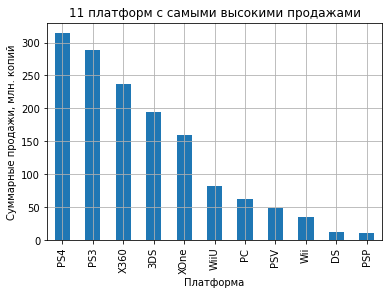

In [34]:
plot_top_platfortms(df=actual_data, n_top_platforms=11)

**Согласно полученному графику, в период с 2012 по 2016 гг. по суммарным продажам лидируют следующие платформы: PS4, PS3, X360, 3DS, XOne. Ближайшими к ним показателями обладают платформы WiiU и PC, однако для каждой из них суммарные продажи почти в 2 раза ниже, чем для XOne, поэтому в дальнейшем анализе будем рассматривать только первые 5 платформ.**

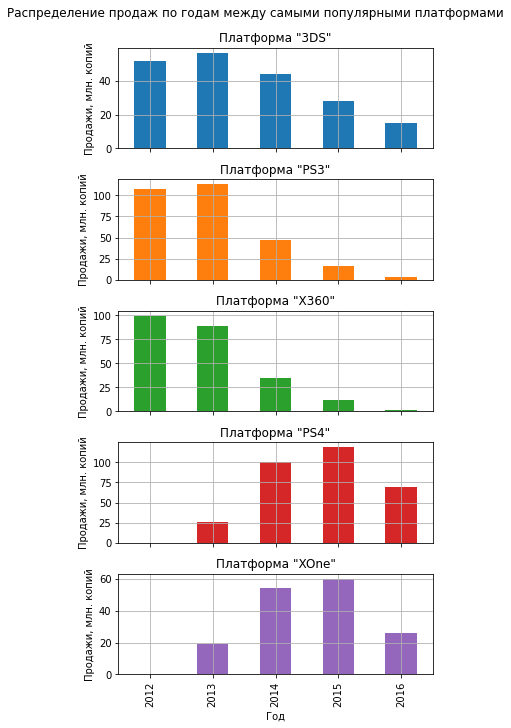

In [35]:
plot_platforms_individually(df=actual_data, n_top_platforms=5, width=5)

**Похоже, что платформы 3DS, PS3 и X360 уходят с рынка, породажи игр для них уже в 2014 г. составляют менее 50 млн. копий. В то же время, похоже, что платформы PS4 и XOne выходят в лидеры. На всех графиках для 2016 г. показатели ниже, чем за предыдущие года, это может быть связано с тем, что в исходном датасете 2016й год представлен не полностью.**

Построим диаграмму размаха глобальных продаж игр за период 2012-2016 гг. для 5 самых популярных платформ.

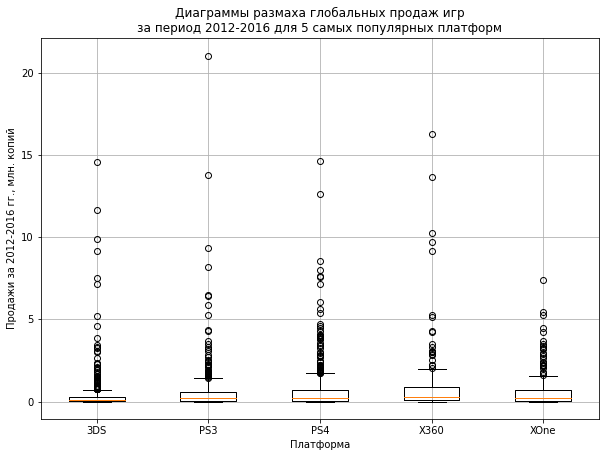

In [37]:
platforms_list = sorted(platforms_list)

pl_list = list()
for pl in platforms_list:
    pl_list.append(actual_data.query('platform == @pl').total_sales)

    
fig, ax = plt.subplots(figsize=(10,7))
ax.boxplot(pl_list, labels=platforms_list)

ax.set_ylabel('Продажи за 2012-2016 гг., млн. копий')
ax.set_xlabel('Платформа')
ax.set_title('Диаграммы размаха глобальных продаж игр\nза период 2012-2016 для 5 самых популярных платформ')

plt.grid()
plt.show()

Посчитаем медиану и среднее для глобальных продаж игр за период с 2012 по 2016 годы для 5 самых популярных платформ.

In [38]:
(actual_data
 .query('platform.isin(@platforms_list)')
 .groupby('platform')
 .total_sales
 .agg(['median', 'mean'])
 .transpose()
)

platform,3DS,PS3,PS4,X360,XOne
median,0.110000,0.200000,0.200000,0.310000,0.22000
mean,0.491439,0.585781,0.801378,0.810068,0.64502


**Согласно построенной диаграмме размаха и значениям в таблице выше, для рассмотренных платформ медианные значения суммарных продаж довольно близки: для PS3, PS4 и XOne медианное значение составляет около 200 тыс. копий; для 3DS медианное значение ниже - 110 тыс. копий; для X360 медианное значение выше - 310 тыс.**

**На диаграмме размаха большое количество выбросов, при этом, все выбросы в большую сторону. Таким образом каждая из 5 самых популярных платформ имела большое количество игр, которые пользовались большим коммерческим успехом, по сравнению с остальными. Эти выбросы сильно смещают среднее значение. Согласно таблице выше, наибольшим средним значением обладают игры выпущенные для X360, PS4, XOne.**

**Как мы уже заметили, платформы 3DS, PS3 и X360, уходят с рынка, то время как, платформы PS4 и XOne выходят в лидеры. Таким образом, имеет смысл впервую очередь концентрироваться на играх для платформ PS4 и XOne, возможно, стоит также обратить внимание на проекты для X360 (или совместимые с ней), но отдавать им меньший приоритет.**

### Связь между продажами и отзывами

Изуим корреляцию между отзывами (как пользователей, так и критиков) и суммарных продаж для игр, выходивших на PS4.
Для этого построим диаграмму рассеяния и вычислим коэффициент корреляции.

In [39]:
def plot_correlation(df, platform_name, user=True, ax=None):
    plot_params = dict(x='user_score', 
                       y='total_sales', 
                       kind='scatter',
                       alpha=0.7,
                       title='Связь между отзывами пользователей\nи количеством продаж для ' + platform_name,
                       xlabel='Оценка пользователей',
                       ylabel='Суммарные продажи, млн. копий',
                       grid=True,
                       ax=ax,
                      )
    
    if not user:
        plot_params['x'] = 'critic_score'
        plot_params['title'] = 'Связь между отзывами критиков\nи количеством продаж для ' + platform_name
        plot_params['xlabel'] = 'Оценка критиков'
        
    ax = df.query('platform == @platform_name').plot(**plot_params)
    
    return ax


def prin_corr_coef(df, platform_name, user=True):
    x='user_score'
    if not user:
        x = 'critic_score'
    corr = df.query('platform == @platform_name')[[x, 'total_sales']].corr().iloc[0, 1]
    
    if user:
        print(f'Коэффициент корреляции между оценками пользователей и суммарными продажами равен {corr:.3f}')
    else:
        print(f'Коэффициент корреляции между оценками критиков и суммарными продажами равен {corr:.3f}')
        
        
def explore_correlation(df, platform_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 5))

    plot_correlation(df=actual_data, platform_name=platform_name, ax=ax1)
    plot_correlation(df=actual_data, platform_name=platform_name, user=False, ax=ax2)
    plt.show()

    print(f'Платформа {platform_name}')
    prin_corr_coef(df=actual_data, platform_name=platform_name)
    prin_corr_coef(df=actual_data, platform_name=platform_name, user=False)

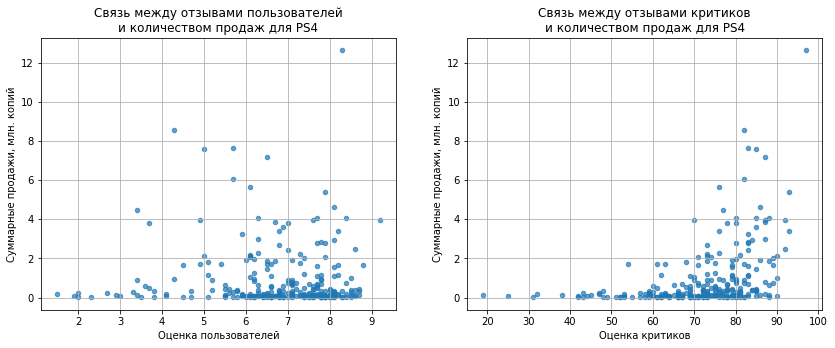

Платформа PS4
Коэффициент корреляции между оценками пользователей и суммарными продажами равен -0.032
Коэффициент корреляции между оценками критиков и суммарными продажами равен 0.407


In [40]:
explore_correlation(df=actual_data, platform_name='PS4')

Корреляция между оценками пользователей и суммарными продажами игра для платформы PS4 отсутствует, при этом прослеживается слабая корреляция между отзывами критиков и суммарными продажами.

Исследуем корреляцию между оценками и суммарными продажами для других платформ.

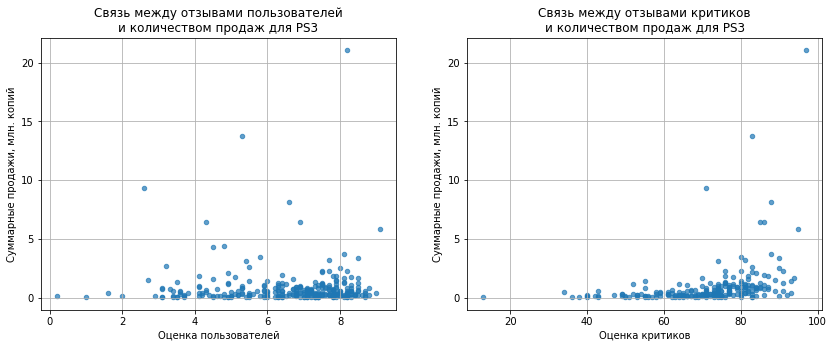

Платформа PS3
Коэффициент корреляции между оценками пользователей и суммарными продажами равен -0.005
Коэффициент корреляции между оценками критиков и суммарными продажами равен 0.331


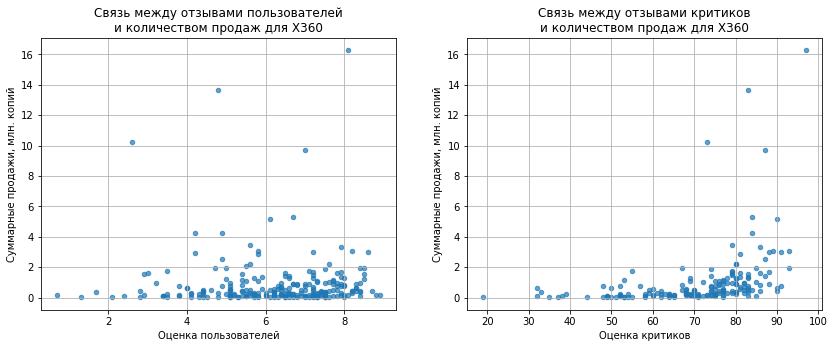

Платформа X360
Коэффициент корреляции между оценками пользователей и суммарными продажами равен 0.006
Коэффициент корреляции между оценками критиков и суммарными продажами равен 0.361


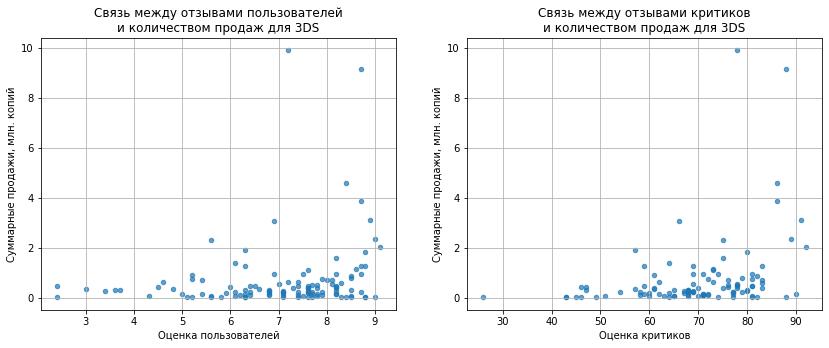

Платформа 3DS
Коэффициент корреляции между оценками пользователей и суммарными продажами равен 0.198
Коэффициент корреляции между оценками критиков и суммарными продажами равен 0.321


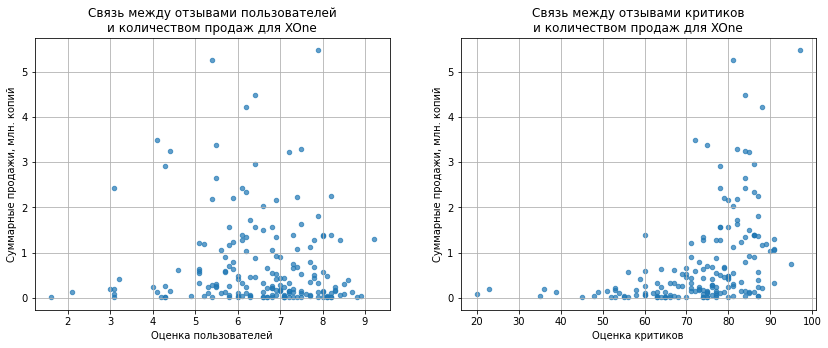

Платформа XOne
Коэффициент корреляции между оценками пользователей и суммарными продажами равен -0.069
Коэффициент корреляции между оценками критиков и суммарными продажами равен 0.417


In [41]:
for pl in ['PS3', 'X360', '3DS', 'XOne']:
    explore_correlation(df=actual_data, platform_name=pl)

**Корреляция между оценками (как критиков так и пользователей) и суммарными продажами слабая. При этом, корреляция между оценками ползователей и суммарными продажами отсутствует для следующих платформ PS4, PS3, X360, XOne; для платформы 3DS коэфиициент корреляции приблизительно равен 0.2. Между оценками критиков и суммарными продажами корреляция сильнее: для всех платформ коэффициент корреляции приблизительно равен 0.3 - 0.4.**

### Распределение игр по жанрам



Построим диаграммы размаха суммарных продаж игры для каждого жанра.

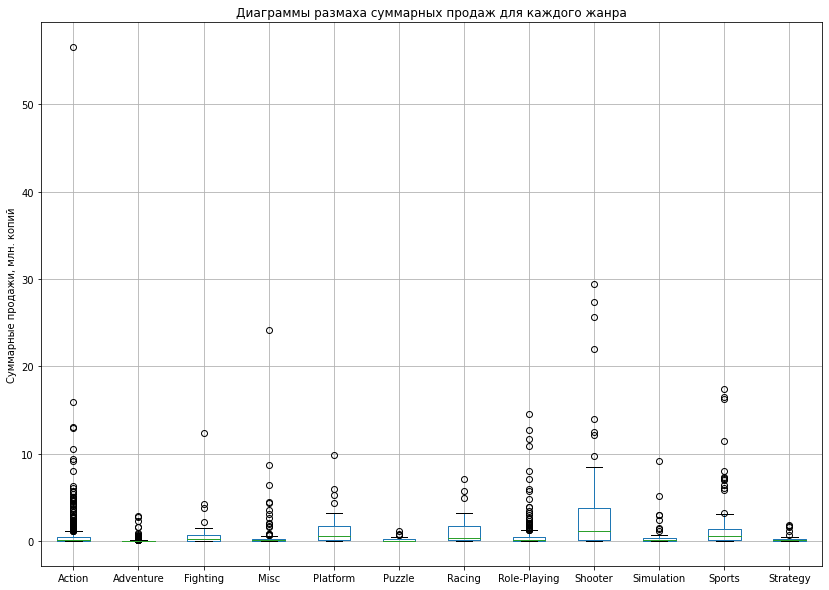

In [42]:
sales_by_genre = actual_data.pivot_table(index='name', columns='genre', values='total_sales', aggfunc='sum')

sales_by_genre.plot(kind='box', 
                    xlabel='Жанр',
                    ylabel='Суммарные продажи, млн. копий',
                    title='Диаграммы размаха суммарных продаж для каждого жанра',
                    figsize=(14, 10), 
                    grid=True
                   )

plt.show()

На графике много выбросов, самый высокий находится в жанре Action и соответствует игре Grand Theft Auto V, показавшей результат в 56.58 млн. проданных копий. Построим тот же самый график, но отобразим диапазон от 0 до 10 млн..

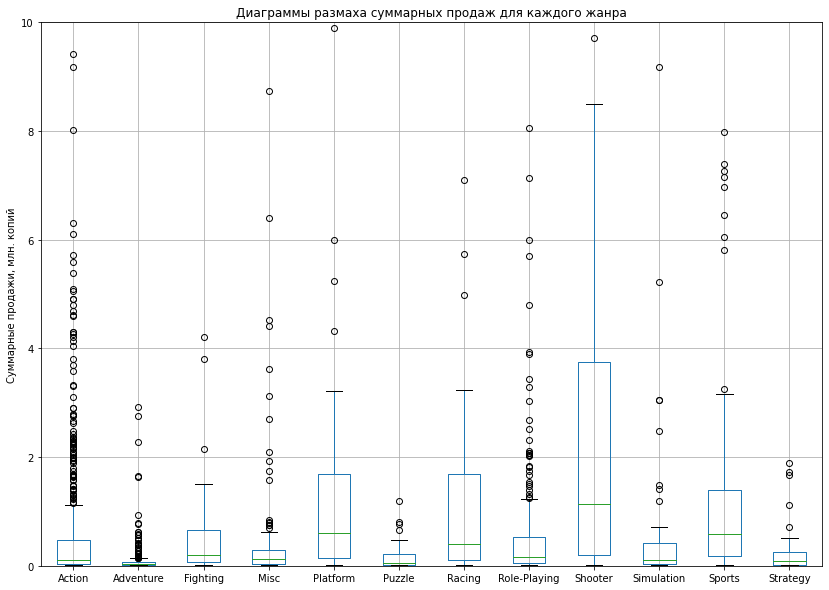

In [43]:
sales_by_genre.plot(kind='box', 
                    ylim=(0,10),
                    xlabel='Жанр',
                    ylabel='Суммарные продажи, млн. копий',
                    title='Диаграммы размаха суммарных продаж для каждого жанра',
                    figsize=(14, 10), 
                    grid=True
                   )

plt.show()

Невооружённым глазом видно, что наибольшим медианным значением обладают игры в жанре Shooter. 

Расчитаем для каждого жанра следующие статистики:
- медиану (столбец `median`),
- среднее (столбец `mean`),
- минимум (столбец `min`),
- максимум (столбец `max`),
- сумму (столбец `sum`),
- количество игр (столбец `count`).

In [44]:
stats = sales_by_genre.agg(['median', 'mean', 'min', 'max', 'sum', 'count']).transpose().sort_values('median', ascending=False)
stats

,median,mean,min,max,sum,count
Shooter,1.130,3.207684,0.01,29.40,304.73,95.0
Platform,0.610,1.326087,0.01,9.90,61.00,46.0
Sports,0.580,1.828990,0.01,17.37,181.07,99.0
Racing,0.410,1.114583,0.01,7.09,53.50,48.0
Fighting,0.200,0.729344,0.01,12.42,44.49,61.0
Role-Playing,0.160,0.727547,0.01,14.60,192.80,265.0
Misc,0.120,0.654154,0.01,24.16,85.04,130.0
Action,0.105,0.768502,0.01,56.58,441.12,574.0
Simulation,0.100,0.575738,0.01,9.17,35.12,61.0
Strategy,0.085,0.247037,0.01,1.90,13.34,54.0


**Минимальные значения суммарных продаж для всех жанров (по крайней мере, за 2012-2016 гг.)  ограничены 10000 экземляров. Видимо, игры с меньшими показателями не вошли в датасет.**

Представим распределение количества игр по жанрам ввиде столбчатой диаграммы. Игры с одинаковыми названиями (неважно была ли это одна и та же игра, выпущенная для разных полатформ, или переиздание) считаются за одну.

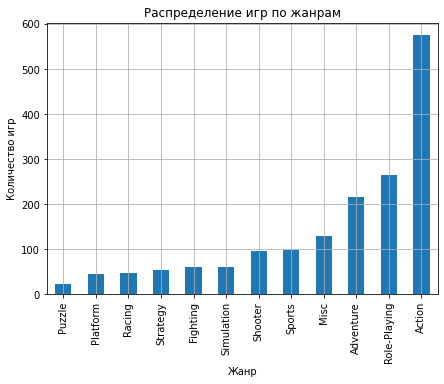

In [45]:
stats['count'].sort_values().plot(kind='bar', 
                                  grid=True, 
                                  title='Распределение игр по жанрам',
                                  xlabel='Жанр', 
                                  ylabel='Количество игр',
                                  figsize=(7, 5),
                                 )
plt.show()

**Больше всего игр издаётся в жанрах Action, Role-Playing и Adventure, меньше всего - в жанрах Puzzle, Platform и Racing.**

Представим распределение общего количества проданных копий для каждого жанра ввиде столбчатой диаграммы.

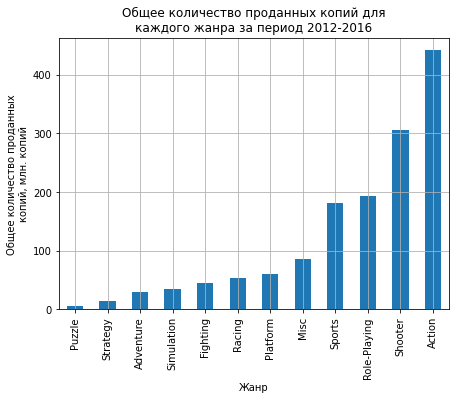

In [46]:
stats['sum'].sort_values().plot(kind='bar',
                                ylabel='Общее количество проданных\nкопий, млн. копий',
                                xlabel='Жанр',
                                title='Общее количество проданных копий для\nкаждого жанра за период 2012-2016',
                                grid=True,
                                figsize=(7, 5),
                               )

plt.show()

**Распределение общего количества проданных копий для каждого жанра отличается от распределения количества издаваемых игр. Больше всего копий продаётся в жанрах Action, Shooter и Role-Playing, меньше всего - в жанрах Puzzle, Strategy и Adventure.**

Представим распределение медианного значения количества продаж одной игры для каждого жанра.

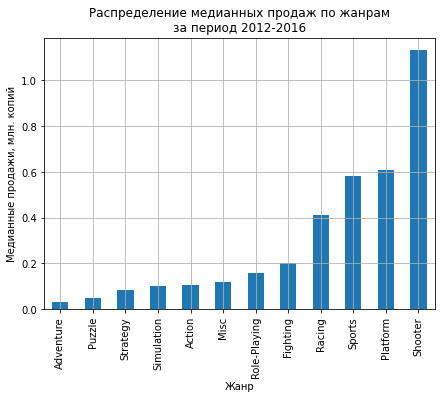

In [47]:
stats['median'].sort_values().plot(kind='bar',
                                ylabel='Медианные продажи, млн. копий',
                                xlabel='Жанр',
                                title='Распределение медианных продаж по жанрам\nза период 2012-2016',
                                grid=True,
                                figsize=(7, 5),
                               )

plt.show()

**Наибольшим медианным значением суммарных продаж обладают игры из жанров Shooter, Platform, Sports и Racing. Наименьшим - игры из жанров Adventure, Puzzle, Strategy и Simulation.**

**Поскольку распределения значений суммарных продаж для игр обладают значительным количеством выбросов, надёжнее полагаться на медианные оценки. Таким образом, к жанрам с высокими продажами можно условно отнести следующие:**  
**1. Shooter,**  
**2. Platform,**  
**3. Sports;**

**к жанрам с низкими продажами:**  
**1. Adventure,**  
**2. Puzzle,**  
**3. Strategy.**

**Игры в жанре Action обладают низким медианным значением суммарных продаж. Высокое суммарное значение продаж (сумма по всем играми) может объясняться тем, что в данном жанре выпускается самое большое количество игр, пускай и не очень успешных, также может иметь место эффект от Grand Theft Auto V, однако при планировании рекламных компаний нужно понимать, что не каждый проект сможет приблизиться к рекорду в 56.58 млн. проданных копий (что видно на диаграмме размаха).**

## Портрет пользователя каждого региона

### Северная Америка (NA)

#### Самые популярные платформы (топ-5)
Расчитаем доли продаж среди 5 самых популярных в Североной Америке платформ. Результат представим ввиде гистограммы.

Доли продаж среди 5 самых популярных в Северной Америке платформ:


platform
X360    0.24
PS4     0.18
PS3     0.17
XOne    0.16
3DS     0.09
Name: na_sales, dtype: float64

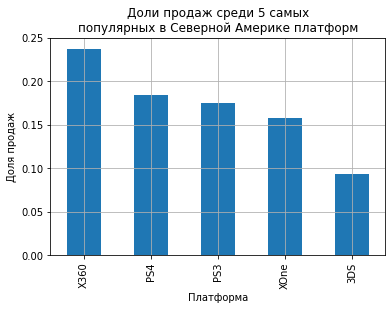

In [48]:
na_platform = actual_data.groupby('platform').na_sales.sum().sort_values(ascending=False)
na_platform /= actual_data.na_sales.sum()
na_platform = na_platform[:5]

print('Доли продаж среди 5 самых популярных в Северной Америке платформ:')
display(na_platform.round(2))

na_platform.plot(kind='bar', 
                 xlabel='Платформа',
                 ylabel='Доля продаж',
                 title='Доли продаж среди 5 самых\nпопулярных в Северной Америке платформ',
                 ylim=(0, 0.25), 
                 grid=True
                )
plt.show()

**Самой популярной платформой в Северной Америке является X360, на которую приходится чуть менее четверти всех продаж.**
**5 самых популярных платформ в порядке убывания доли продаж:**
1. X360
1. PS4
1. PS3
1. XOne
1. 3DS

#### Самые популярные жанры (топ-5)


Доли продаж среди 5 самых популярных в Северной Америке жанров:


genre
Action          0.30
Shooter         0.24
Sports          0.14
Role-Playing    0.11
Misc            0.06
Name: na_sales, dtype: float64

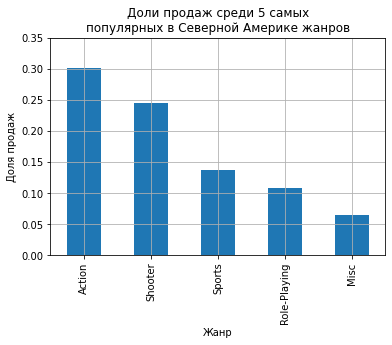

In [49]:
na_genre = actual_data.groupby('genre').na_sales.sum().sort_values(ascending=False)
na_genre /= actual_data.na_sales.sum()
na_genre = na_genre[:5]

print('Доли продаж среди 5 самых популярных в Северной Америке жанров:')
display(na_genre.round(2))

na_genre.plot(kind='bar', 
                 xlabel='Жанр',
                 ylabel='Доля продаж',
                 title='Доли продаж среди 5 самых\nпопулярных в Северной Америке жанров',
                 ylim=(0, 0.35), 
                 grid=True
                )
plt.show()

**Самым популярным жанром в Северной Америке является Action, на который приходится около 30% продаж.**
**5 самых популярных платформ в порядке убывания доли продаж:**
1. Action
1. Shooter
1. Sports
1. Role-Playing
1. Misc

#### Влияние рейтинга ESRB на продажи в регионе
Будем оценивать только игры для которых указан рейтинг ESRB.

Доли продаж в зависимости от рейтинга ESRB в Северной Америке:


rating
M          0.39
E          0.19
Unknown    0.17
E10+       0.13
T          0.11
Name: na_sales, dtype: float64

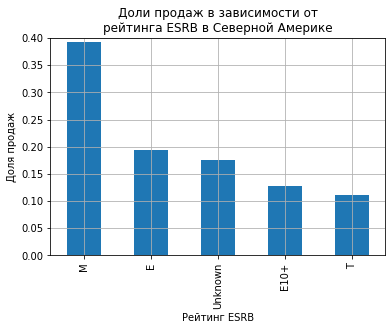

In [50]:
na_rating = actual_data.groupby('rating').na_sales.sum().sort_values(ascending=False)
na_rating /= actual_data.na_sales.sum()

print('Доли продаж в зависимости от рейтинга ESRB в Северной Америке:')
display(na_rating.round(2))

na_rating.plot(kind='bar', 
                 xlabel='Рейтинг ESRB',
                 ylabel='Доля продаж',
                 title='Доли продаж в зависимости от\nрейтинга ESRB в Северной Америке',
                 ylim=(0, 0.4), 
                 grid=True
                )
plt.show()

**Для Северной Америки игры, выпущенные в 2012-2016 гг. представлены следующими рейтингами ESRB (в порядке убывания доли продаж):**
1. M - ("Mature" - "Для взрослых". 17+);
1. E - ("Everyone" - "Для всех");
1. Unknown - рейтинг не определён (значение заглушка);
1. E10+ - ("Everyone 10 and older" - "Для всех от 10 лет и старше");
1. T - ("Teen" - "Подросткам". 13+).

**Больше всего продаж приходится на рейтинг M.**

### Европа (EU)

#### Самые популярные платформы (топ-5)
Расчитаем доли продаж среди 5 самых популярных в Европе платформ. Результат представим ввиде гистограммы.

Доли продаж среди 5 самых популярных в Европе платформ:


platform
PS4     0.28
PS3     0.21
X360    0.15
XOne    0.10
3DS     0.08
Name: eu_sales, dtype: float64

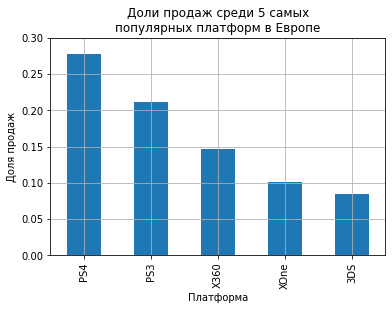

In [51]:
eu_platform = actual_data.groupby('platform').eu_sales.sum().sort_values(ascending=False)
eu_platform /= actual_data.eu_sales.sum()
eu_platform = eu_platform[:5]

print('Доли продаж среди 5 самых популярных в Европе платформ:')
display(eu_platform.round(2))

eu_platform.plot(kind='bar', 
                 xlabel='Платформа',
                 ylabel='Доля продаж',
                 title='Доли продаж среди 5 самых\nпопулярных платформ в Европе',
                 ylim=(0, 0.3), 
                 grid=True
                )
plt.show()

**Распределение доли продаж по платформам в Европе отличается от аналогичного распределения в Серверной Америке. Самой популярной является PS4, на которую приходится более четверти всех продаж, a X360 находится уже только на 3ем месте.**
**5 самых популярных платформ в порядке убывания доли продаж:**
1. PS4
1. PS3
1. X360
1. XOne
1. 3DS

#### Самые популярные жанры (топ-5)


Доли продаж среди 5 самых популярных в Европе жанров:


genre
Action          0.31
Shooter         0.22
Sports          0.14
Role-Playing    0.10
Racing          0.05
Name: eu_sales, dtype: float64

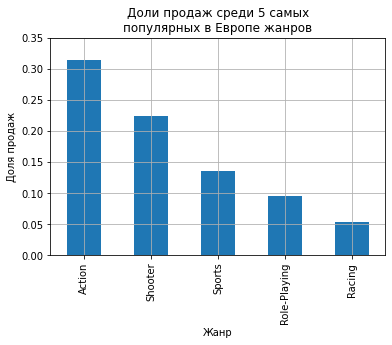

In [52]:
eu_genre = actual_data.groupby('genre').eu_sales.sum().sort_values(ascending=False)
eu_genre /= actual_data.eu_sales.sum()
eu_genre = eu_genre[:5]

print('Доли продаж среди 5 самых популярных в Европе жанров:')
display(eu_genre.round(2))

eu_genre.plot(kind='bar', 
                 xlabel='Жанр',
                 ylabel='Доля продаж',
                 title='Доли продаж среди 5 самых\nпопулярных в Европе жанров',
                 ylim=(0, 0.35), 
                 grid=True
                )
plt.show()

**Распределение продаж по жанрам в Европе похоже на распределение в Северной Америке. 
**Самым популярным жанром  является Action, на него приходится около 30% продаж.**
**5 самых популярных платформ в порядке убывания доли продаж:**
1. Action
1. Shooter
1. Sports
1. Role-Playing
1. Racing  
**В отличии от распределения для Северной Америки, в Европе пятёрку самых популярных жанров закрывает Racing.**

#### Влияние рейтинга ESRB на продажи в регионе
Будем оценивать только игры для которых указан рейтинг ESRB.

Доли продаж в зависимости от рейтинга ESRB в Европе:


rating
M          0.38
E          0.22
Unknown    0.18
E10+       0.11
T          0.10
Name: eu_sales, dtype: float64

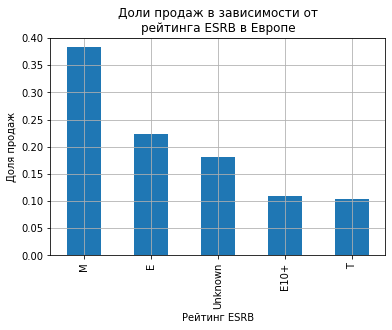

In [53]:
eu_rating = actual_data.groupby('rating').eu_sales.sum().sort_values(ascending=False)
eu_rating /= actual_data.dropna(subset=['rating']).eu_sales.sum()

print('Доли продаж в зависимости от рейтинга ESRB в Европе:')
display(eu_rating.round(2))

eu_rating.plot(kind='bar', 
                 xlabel='Рейтинг ESRB',
                 ylabel='Доля продаж',
                 title='Доли продаж в зависимости от\nрейтинга ESRB в Европе',
                 ylim=(0, 0.4), 
                 grid=True
                )
plt.show()

**Распределение долей продаж по рейтингам ESRB в Европе повторяет аналогичное распределение в Северной Америке.**
**Игры представлены следующими рейтингами ESRB (в порядке убывания доли продаж):**
1. M - ("Mature" - "Для взрослых". 17+);
1. E - ("Everyone" - "Для всех");
1. Unknown - рейтинг не определён (значение заглушка);
1. E10+ - ("Everyone 10 and older" - "Для всех от 10 лет и старше");
1. T - ("Teen" - "Подросткам". 13+).

**Больше всего продаж приходится на рейтинг M.**

### Япония (JP)

#### Самые популярные платформы (топ-5)
Расчитаем доли продаж среди 5 самых популярных в Японии платформ. Результат представим ввиде гистограммы.

Доли продаж среди 5 самых популярных в Японии платформ:


platform
3DS     0.46
PS3     0.18
PSV     0.11
PS4     0.08
WiiU    0.07
Name: jp_sales, dtype: float64

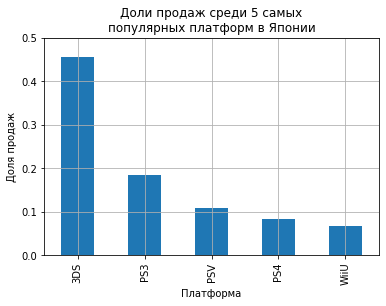

In [54]:
jp_platform = actual_data.groupby('platform').jp_sales.sum().sort_values(ascending=False)
jp_platform /= actual_data.jp_sales.sum()
jp_platform = jp_platform[:5]
print('Доли продаж среди 5 самых популярных в Японии платформ:')
display(jp_platform.round(2))

jp_platform.plot(kind='bar', 
                 xlabel='Платформа',
                 ylabel='Доля продаж',
                 title='Доли продаж среди 5 самых\nпопулярных платформ в Японии',
                 ylim=(0, 0.5), 
                 grid=True
                )
plt.show()

**Распределение доли продаж по платформам в Японии существенно отличается от аналогичных распределений в Серверной Америке и Европе. Самой популярной является 3DS, на которую приходится около 45% продаж.**
**5 самых популярных платформ в порядке убывания доли продаж:**
1. 3DS
1. PS3
1. PSV
1. PS4
1. WiiU  
**Интересно, что среди 5 самых популярных нет ни X360, ни XOne.**

#### Самые популярные жанры (топ-5)


Доли продаж среди 5 самых популярных в Японии жанров:


genre
Role-Playing    0.34
Action          0.27
Misc            0.07
Simulation      0.05
Fighting        0.05
Name: jp_sales, dtype: float64

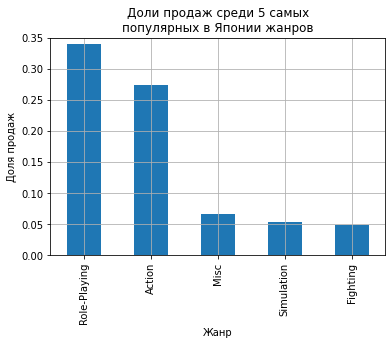

In [55]:
jp_genre = actual_data.groupby('genre').jp_sales.sum().sort_values(ascending=False)
jp_genre /= actual_data.jp_sales.sum()
jp_genre = jp_genre[:5]
print('Доли продаж среди 5 самых популярных в Японии жанров:')
display(jp_genre.round(2))

jp_genre.plot(kind='bar', 
                 xlabel='Жанр',
                 ylabel='Доля продаж',
                 title='Доли продаж среди 5 самых\nпопулярных в Японии жанров',
                 ylim=(0, 0.35), 
                 grid=True
                )
plt.show()

**Распределение продаж по жанрам для Японии также отличается от распределений в Европе и Северной Америке. 
**Самым популярным жанром  является Role-Playing, на него приходится 34% продаж.**
**5 самых популярных платформ в порядке убывания доли продаж:**
1. Role-Playing
1. Action
1. Misc
1. Simulation
1. Fighting  
**При чём продажи в жнарах Role-Playing и Action вместе составляют более 60%.**

#### Влияние рейтинга ESRB на продажи в регионе


Доли продаж в зависимости от рейтинга ESRB в Японии:


rating
Unknown    0.57
E          0.15
T          0.14
M          0.11
E10+       0.04
Name: jp_sales, dtype: float64

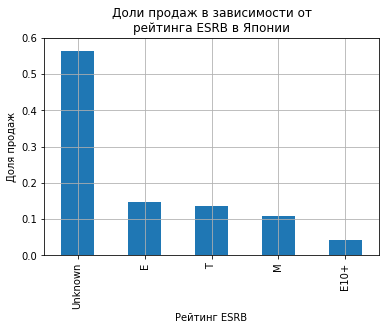

In [56]:
jp_rating = actual_data.groupby('rating').jp_sales.sum().sort_values(ascending=False)
jp_rating /= actual_data.dropna(subset=['rating']).jp_sales.sum()

print('Доли продаж в зависимости от рейтинга ESRB в Японии:')
display(jp_rating.round(2))

jp_rating.plot(kind='bar', 
                 xlabel='Рейтинг ESRB',
                 ylabel='Доля продаж',
                 title='Доли продаж в зависимости от\nрейтинга ESRB в Японии',
                 ylim=(0, 0.6), 
                 grid=True
                )
plt.show()

**Распределение долей продаж по рейтингам ESRB в Японии за 2012-2016 гг. также предствалено рейтингами E, T, M, E10+, однако продажи распределены не так как в Северной Америке и Европе.**
**Игры представлены следующими рейтингами ESRB (в порядке убывания доли продаж):**
1. Unknown - рейтинг не определён (значение заглушка);
1. E - ("Everyone" - "Для всех");
1. T - ("Teen" - "Подросткам". 13+);
1. M - ("Mature" - "Для взрослых". 17+);
1. E10+ - ("Everyone 10 and older" - "Для всех от 10 лет и старше").

**Больше всего продаж приходится на рейтинг Unknown, что может быть связано с тем, что японские издатели не проводят оценку рейтинга ESRB игр, предназначенных для локального рынка.**

**Таким образом, портреты пользователей для Европы и Северной Америки очень похожи: продажи распределены по одним и тем же платформам, однако в Северной америке лидирует X360, а в Европе PS4; распределения по жанрам практически совпадают - лидируют игры в жанрах Action и Shooter; распределения по рейтингам ESRB практически одинаковые - самый популярный рейтинг М.**

**Портрет пользователей из Японии значительно отличается от портрета пользователей из Европы и Северной Америки: самая популярная платформа - 3DS, самый популярный жанр Role-Playing, самый популярный рейтинг ESRB - Unknown.**

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Чтобы ответить на вопрос одинаковы средние пользовательские рейтинги платформ Xbox One и PC или нет, необходимо проверить гипотезу о равенстве средних двух разных и независимых генеральных совокупностей, поэтому будем использовать парный t-тест (функция `ttest_ind` из модуля `scipy.stats`.

**Сформулируем нулувую (H0) и альтернативную (H1) гипотезы следующим образом:**
- **H0: Генеральные совокупности значений пользовательских рейтингов платформ Xbox One и PC имеют одиковые математические ожидания.**
- **H1: Генеральные совокупности значений пользовательских рейтингов платформ Xbox One и PC имеют разные математические ожидания.**

Для начала, сформируем выборку с пользовательскими рейтингами платформы Xbox One (массив `xone_user_score`) и выборку с пользовательскими рейтингами платформы PC (массив `pc_user_score`), проверим размеры выборок и их дисперсии.

In [57]:
xone_user_score = actual_data.query('platform == "XOne"').user_score.dropna()
pc_user_score = actual_data.query('platform == "PC"').user_score.dropna()

print('Выборка с пользовательскими рейтингами платформы Xbox One')
print(f'Размер выборки: {len(xone_user_score)}')
print(f'Дисперсия: {xone_user_score.var():.3}')

print()

print('Выборка с пользовательскими рейтингами платформы PC')
print(f'Размер выборки: {len(pc_user_score)}')
print(f'Дисперсия: {pc_user_score.var():.3}')

Выборка с пользовательскими рейтингами платформы Xbox One
Размер выборки: 182
Дисперсия: 1.91

Выборка с пользовательскими рейтингами платформы PC
Размер выборки: 206
Дисперсия: 2.77


Размеры выборок и их дисперсии отличаются, поэтому параметру `equal_var` присвоим значение `False`.

Проверим гипотезу. **Зададим пороговое значение `alpha` равным  `0.05`.**

In [58]:
alpha = 0.05

results = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False)

print(f'p-значение: {results.pvalue:.3f}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.') 

p-значение: 0.549
Не получилось отвергнуть нулевую гипотезу.


**Таким образом, у нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.**

### Средние пользовательские рейтинги жанров Action и Sports разные
Чтобы ответить на вопрос различаются средние пользовательские рейтинги жанров Action и Sports или нет, необходимо проверить гипотезу о равенстве средних двух генеральных совокупностей, поэтому будем использовать парный t-тест (функция `ttest_ind` из модуля `scipy.stats`).

**Сформулируем нулувую (H0) и альтернативную (H1) гипотезы следующим образом:**
- **H0: Генеральные совокупности значений пользовательских рейтингов жанров Action и Sports имеют одиковые математические ожидания.**
- **H1: Генеральные совокупности значений пользовательских рейтингов жанров Action и Sports имеют разные математические ожидания.**

Для начала, сформируем выборку с пользовательскими рейтингами жанра Action (массив `action_user_score`) и выборку с пользовательскими рейтингами жанра Sports (массив `sports_user_score`), проверим размеры выборок и их дисперсии.

In [59]:
action_user_score = actual_data.query('genre == "Action"').user_score.dropna()
sports_user_score = actual_data.query('genre == "Sports"').user_score.dropna()

print('Выборка с пользовательскими рейтингами жанра Action')
print(f'Размер выборки: {len(action_user_score)}')
print(f'Дисперсия: {action_user_score.var():.3}')

print()

print('Выборка с пользовательскими рейтингами жанра Sports')
print(f'Размер выборки: {len(sports_user_score)}')
print(f'Дисперсия: {sports_user_score.var():.3}')

Выборка с пользовательскими рейтингами жанра Action
Размер выборки: 523
Дисперсия: 1.89

Выборка с пользовательскими рейтингами жанра Sports
Размер выборки: 195
Дисперсия: 3.02


Размеры выборок и их дисперсии отличаются, поэтому параметру `equal_var` присвоим значение `False`.

Проверим гипотезу. **Зададим пороговое значение `alpha` равным  `0.05`.**

In [60]:
alpha = 0.05

results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False)

print(f'p-значение: {results.pvalue:.3E}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.') 

p-значение: 4.243E-20
Отвергаем нулевую гипотезу.


**Таким образом, у нас есть основания утверждать, что пользоательские рейтинги игр в жанрах Action и Sports существенно отличаются.**

## Выводы

1. Исходный датасет содержит пропуски данных, причиной которых могло стать как отсутствие тех или иных данных в открытом доступе (например, критики еще не успели дать оценку), так и технические ошибки при сборе данных (например, пропуски в столбце `name`).
1. В разные годы выпускалось разное количество игр. В период с 1990 г. по 2008 г. количество выпускаемых игр росло, в период с 2009 г. по 2012 г. оно сократилось вдове.
1. За весь период, охваченный в датасете продажи по платформам неоднородны. Самые лучшие показатели за весь период у следующих:
    - PS2 ;
    - X360;
    - PS3 ;
    - Wii ;
    - DS ;
    - PS ;
    - PS4 ;
    - GBA ;
    - PSP ;
    - 3DS .
1. Новая платформа появляется каждые 3-5 лет, продажи игр для неё достигают пика на 3й-6й год. В течение жизненного цикла платформы продажи игр для неё высоки на протяжении 3-6 лет.
1. На основе исторических данных по 10 самым популярным платформам в качестве актуального выбран период с 2012 по 2016 гг. (последние 5 лет в датасете).
1. Среди платформ с лучшим количество продаж игр платформы 3DS, PS3 и X360 уходят с рынка, в то время как платформы PS4 и XOne выходят в лидеры. Похоже, потенциально прибыльными являются PS4 и XOne.
1. Диаграмма размаха глобальных продаж игр за период 2012-2016 гг. для 5 самых популярных платформ (3DS, PS3, PS4, X360, XOne) имеет большое количество выбросов, при этом все выбросы в большую сторону. Лучшее медимнное значение показала платформа X360, худшее - 3DS.
1. Отзовы пользователей на игры для 5 самых популярных платформ не связаны с количеством продаж (коэффициент корреляции для всех платформ ниже 0.1), отзывы критиков имеют слабую корреляцию с продажами, коэффициенты корреляции лежат в диапазоне 0.3 - 0.4.
1. Больше всего игр издаётся в жанре Action. Lиаграммы размаха суммарных продаж игр для каждого жанра имеют большое количество выбросов и ограничены снизу значением 10000 копий, при этом лучшие медианные значеия показывают жанры Shooter, Platform, Sports, худшие - Adventure, Puzzle, Strategy. Таким образом, к самым прибыльным можно отнести игры в жанрах Shooter, Platform, Sports. Отдельно стоит присмотреться к жанрам Action и Shooter, так как в ниж больше всего продаж (сумма по всем играм), при этом игры в жанре Action обладают посредственным медианным значением суммарных продаж (для одной игры), видимо сказывается то, что в этом жанре издаётся больше всего игр, и рекорд устано вленный GTA5 (56.58 млн. копий).
1. Портреты пользователей для Европы и Северной Америки очень похожи: продажи распределены по одним и тем же платформам, однако в Северной америке лидирует X360, а в Европе PS4; распределения по жанрам практически совпадают - лидируют игры в жанрах Action и Shooter; распределения по рейтингам ESRB практически одинаковые - самый популярный рейтинг М. Портрет пользователей из Японии значительно отличается от портрета пользователей из Европы и Северной Америки: самая популярная платформа - 3DS, самый популярный жанр Role-Playing, самый популярный рейтинг ESRB - Unknown.
1. Для проверкт статистических гипотез был выбран парный t-тест (функция `ttest_ind` из модуля `scipy.stats`) и пороговое значение `alpha = 0.05`. Проверки показали что:
    - нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются;
    - можно утверждать, что средние пользоательские рейтинги игр в жанрах Action и Sports существенно отличаются.